In [1]:
import os

# Reset working directory to your project root
os.chdir("/home/sist/projects/test_ann_to_snn")

print("Working directory reset to:", os.getcwd())



Working directory reset to: /home/sist/projects/test_ann_to_snn


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
print(f"Tensorflow {tf.__version__}")

2025-10-20 15:15:12.635794: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-20 15:15:12.637792: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-20 15:15:12.904365: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-20 15:15:14.707267: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

Tensorflow 2.20.0


In [3]:
# Download data
(X_train, t_train), (X_test, t_test) = tf.keras.datasets.mnist.load_data()

# Normalize inputs
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

# One-hot output vectors
T_train = tf.keras.utils.to_categorical(t_train, 10)
T_test = tf.keras.utils.to_categorical(t_test, 10)

In [13]:
def create_cnn():
    
    inputs = tf.keras.Input(shape = (28, 28, 1))
    x = tf.keras.layers.Conv2D(
        16, 
        kernel_size=(5,5),
        activation='relu',
        padding = 'same',
        use_bias=False)(inputs)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Conv2D(
        64,
        kernel_size=(5,5),
        activation='relu',
        padding = 'same',
        use_bias=False)(x)

    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Conv2D(
        64,
        kernel_size=(5,5),
        activation='relu',
        padding = 'same',
        use_bias=False)(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = tf.keras.layers.Dropout(0.25)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(
        10,
        activation='softmax',
        use_bias=False)(x)

    # Create functional model
    model= tf.keras.Model(inputs, x)
    optimizer = tf.keras.optimizers.SDG(learning_rate=0.01)

    # Loss function
    model.compile(
        loss='categorical_crossentropy', # loss function
        optimizer=optimizer, # learning rule
        metrics=['accuracy'] # show accuracy
    )
    print(model.summary())

    return model

In [ ]:
# Create model
model = create_cnn()

# Train model
history = model.fit(
    X_train, T_train,       # training data
    batch_size=128,          # batch size
    epochs=20,              # Maximum number of epochs
    validation_split=0.1,   # Percentage of training data used for validation
)

import os
print("Before saving:", os.getcwd())
model.save("cnn1.keras")


# Test model
predictions_keras = model.predict(X_test, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, T_test, verbose=0)
print(f"Test accuracy: {test_accuracy}")

2025-10-20 15:15:16.202073: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        25,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │       102,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         5,760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,160 (524.06 KB)

 Trainable params: 134,160 (524.06 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9263 - loss: 0.2241 - val_accuracy: 0.9882 - val_loss: 0.0467
Epoch 2/2
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9785 - loss: 0.0688 - val_accuracy: 0.9880 - val_loss: 0.0482
Before saving: /home/sist/projects/test_ann_to_snn
Test accuracy: 0.9860000014305115


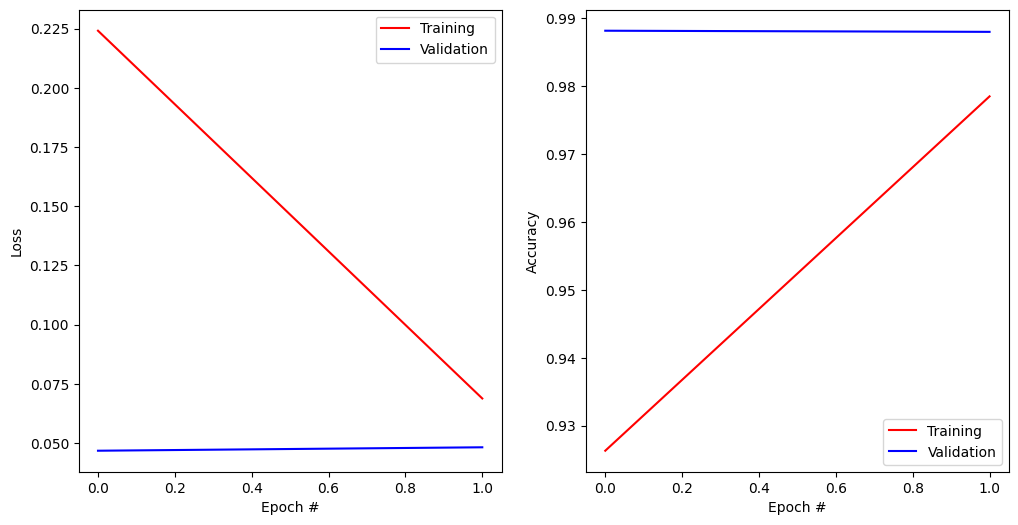

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.plot(history.history['loss'], '-r', label="Training")
plt.plot(history.history['val_loss'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], '-r', label="Training")
plt.plot(history.history['val_accuracy'], '-b', label="Validation")
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [7]:
import ANNarchy
from ANNarchy.extensions.ann_to_snn_conversion import ANNtoSNNConverter
ANNarchy.clear()
snn_converter = ANNtoSNNConverter(
    input_encoding='IB', 
    hidden_neuron='IaF',
    read_out='spike_count',
)


ANNarchy 4.8 (4.8.2.5) on linux (posix).


In [8]:
net = snn_converter.load_keras_model("cnn1.keras", show_info=True)



* Input layer: input_layer, (28, 28, 1)
* InputLayer skipped.
* Conv2D layer: conv2d, (28, 28, 16) 
* MaxPooling2D layer: max_pooling2d, (14, 14, 16) 
* Conv2D layer: conv2d_1, (14, 14, 64) 
* MaxPooling2D layer: max_pooling2d_1, (7, 7, 64) 
* Conv2D layer: conv2d_2, (7, 7, 64) 
* MaxPooling2D layer: max_pooling2d_2, (3, 3, 64) 
* Dropout skipped.
* Flatten skipped.
* Dense layer: dense, 10 
    weights: (10, 576)
    mean -0.013654017820954323, std 0.17434673011302948
    min -1.750084400177002, max 0.7839859127998352



In [12]:
predictions_snn = snn_converter.predict(X_test[:300], duration_per_sample=200)

100%|██████████| 300/300 [08:30<00:00,  1.70s/it]


In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(t_test[:300], predictions_snn))
print("Test accuracy of the SNN:", accuracy_score(t_test[:300], predictions_snn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         2

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Test accuracy of the SNN: 1.0


In [11]:
model = tf.keras.models.load_model('cnn1.keras')
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

loss, accuracy = model.evaluate(X_test, T_test, verbose=1)
print(f"Test accuracy: {accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9860 - loss: 0.0446
Test accuracy: 0.9860
